In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import mlflow
import mlflow.sklearn
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\vivek\anaconda3\envs\urban_flood\Lib\site-packages\mlflow\protos\service_pb2.py:11: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service
c:\Users\vivek\anaconda3\envs\urban_flood\Lib\site-packages\mlflow\utils\requirements_utils.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # noqa: TID251


In [3]:
data = pd.read_csv("../data/final_flood_dataset.csv")

data['timestamp'] = pd.to_datetime(data['timestamp'])

data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

X = data.drop(columns=['flood_risk', 'timestamp'])
y = data['flood_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Accuracy: 1.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



c:\Users\vivek\anaconda3\envs\urban_flood\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vivek\anaconda3\envs\urban_flood\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


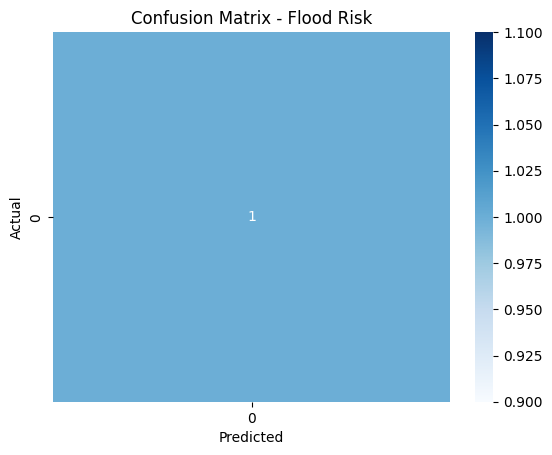

In [4]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Flood Risk")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [6]:
mlflow.set_experiment("Flood_Risk_Prediction")

with mlflow.start_run(run_name="Baseline_RF_For_Deployment"):
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("max_depth", 12)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(rf_model, "baseline_rf_model")

print("✅ Model logged in MLflow for deployment!")


✅ Model logged in MLflow for deployment!


c:\Users\vivek\anaconda3\envs\urban_flood\Lib\site-packages\_distutils_hack\__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\vivek\anaconda3\envs\urban_flood\Lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [7]:
joblib.dump(rf_model, "models/baseline_rf_model.pkl")
print("✅ Model saved as models/baseline_rf_model.pkl")


✅ Model saved as models/baseline_rf_model.pkl


In [8]:
import json
feature_columns = X.columns.tolist()
with open("models/feature_columns.json", "w") as f:
    json.dump(feature_columns, f)
print("✅ Feature columns saved for API input validation")


✅ Feature columns saved for API input validation
